In [1]:
import numpy as np
import sympy as sym
from sympy import Function, Symbol
from sympy import Eq
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
x = sym.Symbol('x', real=True) 
y = sym.Symbol('y', real=True)
z = x + sym.I*y
z

x + I*y

In [3]:
F = z**3-1
F

(x + I*y)**3 - 1

In [4]:
a = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)
f = sym.lambdify([x, y], F, "numpy") 
Feval = f(a,b)
Feval

array([ 1.        -2.00000000e+00j,  0.88122012-1.88122012e+00j,
        0.76723876-1.76723876e+00j,  0.65795698-1.65795698e+00j,
        0.55327585-1.55327585e+00j,  0.45309642-1.45309642e+00j,
        0.35731975-1.35731975e+00j,  0.26584692-1.26584692e+00j,
        0.17857897-1.17857897e+00j,  0.09541698-1.09541698e+00j,
        0.016262  -1.01626200e+00j, -0.05898491-9.41015089e-01j,
       -0.13042268-8.69577316e-01j, -0.19815026-8.01849739e-01j,
       -0.26226658-7.37733420e-01j, -0.32287058-6.77129421e-01j,
       -0.3800612 -6.19938802e-01j, -0.43393737-5.66062626e-01j,
       -0.48459805-5.15401953e-01j, -0.53214215-4.67857846e-01j,
       -0.57666864-4.23331365e-01j, -0.61827643-3.81723572e-01j,
       -0.65706447-3.42935528e-01j, -0.6931317 -3.06868295e-01j,
       -0.72657707-2.73422935e-01j, -0.75749949-2.42500508e-01j,
       -0.78599792-2.14002076e-01j, -0.8121713 -1.87828700e-01j,
       -0.83611856-1.63881443e-01j, -0.85793864-1.42061365e-01j,
       -0.87773047-1.2226

In [5]:
Flist = np.zeros((1,len(Feval)), dtype = list)

for num in range(len(Feval)):
    Flist[0,num] =  (sym.re(Feval[num]),sym.im(Feval[num]))
Flist

array([[(1.00000000000000, -2.00000000000000),
        (0.881220118746902, -1.88122011874690),
        (0.767238758362113, -1.76723875836211),
        (0.657956980271030, -1.65795698027103),
        (0.553275845899048, -1.55327584589905),
        (0.453096416671562, -1.45309641667156),
        (0.357319754013969, -1.35731975401397),
        (0.265846919351663, -1.26584691935166),
        (0.178578974110042, -1.17857897411004),
        (0.0954169797145001, -1.09541697971450),
        (0.0162619975904335, -1.01626199759043),
        (-0.0589849108367626, -0.941015089163237),
        (-0.130422684141692, -0.869577315858308),
        (-0.198150260898960, -0.801849739101040),
        (-0.262266579683170, -0.737733420316830),
        (-0.322870579068926, -0.677129420931074),
        (-0.380061197630834, -0.619938802369166),
        (-0.433937373943496, -0.566062626056504),
        (-0.484598046581518, -0.515401953418482),
        (-0.532142154119503, -0.467857845880497),
        (-0.57666863

In [6]:
# Calcular las partes real e imaginaria
u = sym.re(F)
v = sym.im(F)

# Calcular las derivadas parciales
du_dx = sym.diff(u, sym.re(z))
du_dy = sym.diff(u, sym.im(z))
dv_dx = sym.diff(v, sym.re(z))
dv_dy = sym.diff(v, sym.im(z))

# Crear la matriz jacobiana
jacobian = sym.Matrix([[du_dx, du_dy], [dv_dx, dv_dy]])

# Imprimir la matriz jacobiana
print("El jacobiano de f(z) es:")
jacobian

El jacobiano de f(z) es:


Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [7]:
jacobian_np = sym.lambdify((x, y), jacobian, )
z = [0.5,0.5]

J1 = jacobian_np(z[0], z[1])
J2 = np.linalg.inv(J1)
print(J1)
print(J2)


[[ 0.  -1.5]
 [ 1.5  0. ]]
[[ 0.          0.66666667]
 [-0.66666667 -0.        ]]


In [38]:
def NewtonRaphsonGen(z0, stop_err = 1e-7):
    z = z0.copy()
    trayectory = []
    err = np.inf
    i = 0
    while (err > stop_err):
        zn_1= z.copy()
        
        jacobian_evaluated = np.array(jacobian_np(z[0], z[1]), dtype=np.float64)

        J =np.linalg.inv(jacobian_evaluated)  
        Feval = f(z[0],z[1])
        z = z-np.dot(J, (sym.re(Feval), sym.im(Feval)))
        vec = np.array((z-zn_1),dtype=np.float64)
        err = np.linalg.norm(vec)
        i+=1
    return z

In [40]:
z0 = [0.5,0.5]
NGR = NewtonRaphsonGen(z0)
print(NGR)

[-0.499999999999999 0.866025403784438]


In [51]:
N = 30
x_ = np.linspace(-1,1,N)
y_ = np.linspace(-1,1,N)

In [52]:
Fractal = np.zeros((N,N),np.int64)

In [53]:
error = 1e-7
for i in range(0, len(x_)):
    for j in range (len(y_)):
        
        if x_[i] == 0 and y_[j] == 0:
            continue
        
        z0 = [x_[i],y_[j]]
        V = NewtonRaphsonGen(z0)
        
        if abs(V[0]-(-1/2)) < error and abs(V[1]-(np.sqrt(3)/2))< error:
            Fractal[i][j] = 20
            
        elif abs(V[0]-(-1/2)) < error and abs(V[1]-(-np.sqrt(3)/2))< error:
            Fractal[i][j] = 100
            
        elif abs(V[0]-1) < error and abs(V[1]-0)< error:
            Fractal[i][j] = 255

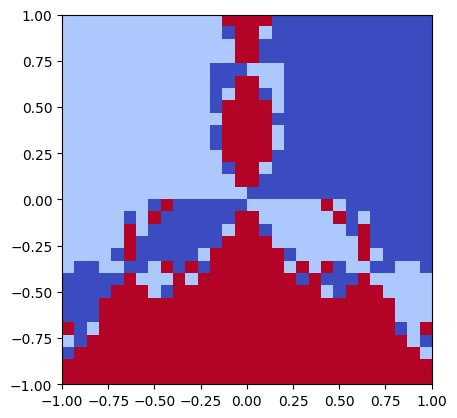

In [54]:
plt.imshow(Fractal,cmap='coolwarm',extent=[-1,1,-1,1])